# Classifying Fashion-MNIST

This project uses the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than the classical MNIST, so it's a better representation of the actual potential of Neural Networks for real world problems/datasets.

In [8]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])
# Download and load the training data
train_set = datasets.FashionMNIST('Data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Download and load the test data
test_set = datasets.FashionMNIST('Data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Here we can see one of the images.

In [2]:
def imshow(image, ax=None, title=None, normalize=True):
    """Revert from Tensor to Image and display"""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [3]:
# Load a batch of images
for images, labels in train_loader:
    pass

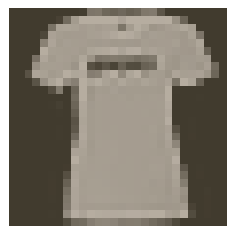

In [4]:
imshow(images[1]);

## Building the network

In [48]:
from torch import nn, optim
import torch.nn.functional as F

In [49]:
# Network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Train the network

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

In [50]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [51]:
epochs = 10

start = time()
for epoch in range(epochs):
    epoch+= 1
    running_loss = 0
    for inputs, labels in train_loader:
         # move input and label tensors to the appropriate device (GPU or CPU)
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        output = model(inputs)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        elapsed = time() - start
    
    print(f"{epoch}/{epochs}) Training loss: {running_loss/len(train_loader):.4f} | Time: {elapsed:.0f} sec")

1/10) Training loss: 0.5154 | Time: 10 sec
2/10) Training loss: 0.3848 | Time: 20 sec
3/10) Training loss: 0.3485 | Time: 30 sec
4/10) Training loss: 0.3250 | Time: 40 sec
5/10) Training loss: 0.3043 | Time: 50 sec
6/10) Training loss: 0.2879 | Time: 61 sec
7/10) Training loss: 0.2758 | Time: 71 sec
8/10) Training loss: 0.2617 | Time: 81 sec
9/10) Training loss: 0.2525 | Time: 91 sec
10/10) Training loss: 0.2461 | Time: 101 sec


In [58]:
def view_classify(image, probability):
    # Preparing data to be used
    probability = probability.data.numpy().squeeze() # remove batch information
    image = img.resize_(1,28,28) # from flatten to matrix structure
    image = image.numpy().squeeze() # remove batch information
    
    # Plotting actual image and Classification Probabilities
    fig, axes = plt.subplots(figsize=(6,9), ncols=2)

    axes[0].imshow(image)
    axes[0].axis('off')
    axes[0].set_title('Actual Image')

    axes[1].barh(range(10), probability)
    axes[1].set_aspect(0.1)
    axes[1].set_yticks(range(10))
    
    fashion_labels = ['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot']
    
    axes[1].set_yticklabels(fashion_labels, size='small')
    
    axes[1].set_xlim(0,1)
    axes[1].set_title('Class Probability')
    plt.tight_layout();

    # Print Classification
    highest_class = probability.argmax() # returns index with highest value
    print(f'Class: {fashion_labels[highest_class]} | Likelihood: {probability[highest_class]:.2%}')

Class: Sandal | Likelihood: 99.93%


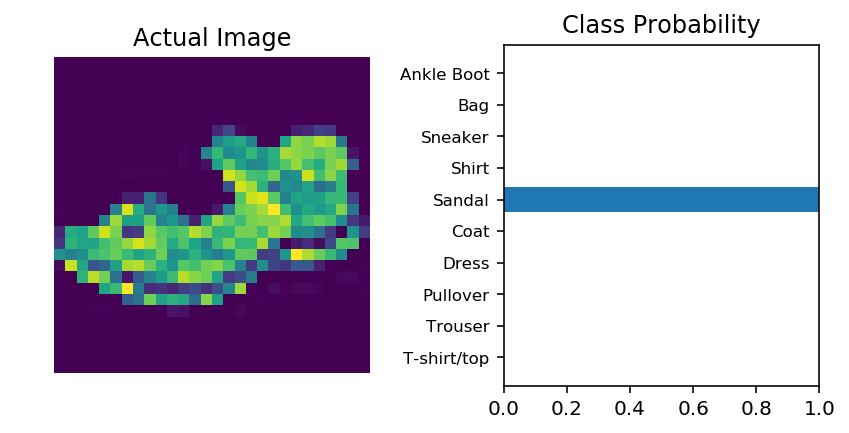

In [61]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[1]

# Calculate the class probabilities
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps)